In [1]:
library(ggplot2)
library(data.table)
library(dplyr)
library(tidyr)
library(purrr) 
library(patchwork)
library(cowplot)
library(ggbreak)
library(scales)
if (!require(extrafont)) install.packages("extrafont")
library(extrafont)

# 3. 폰트 로드
loadfonts()


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



다음의 패키지를 부착합니다: ‘purrr’


The following object is masked from ‘package:data.table’:

    transpose



다음의 패키지를 부착합니다: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


ggbreak v0.1.2

If you use ggbreak in published research, please cite the following
paper:

S Xu, M Chen, T Feng, L Zhan, L Zhou, G Yu. Use ggbreak to effectively
utilize plotting space to deal with large datasets and outliers.
Frontiers in Genetics. 2021, 12:774846. doi: 10.3389/fgene.2021.774846



다음의 패키지를 부착합니다: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


필요한 패키지를 로딩중입니다: extrafont

Registering fonts with R

cmex10 already registered with pdfFont().

cmmi10 alread

# Step 1. Load data

In [2]:
df_ukb <- fread(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/obj2/prediction-XmXf/XmXf.tsv",
    sep = "\t"
) %>% 
  rename(
    lower_Vx_male = lower_male_Vx,
    upper_Vx_male = upper_male_Vx,
    lower_Vx_female = lower_female_Vx,
    upper_Vx_female = upper_female_Vx
  )

head(df_ukb)

pheno,lambda,weight,Vx_male,lower_Vx_male,upper_Vx_male,Vx_female,lower_Vx_female,upper_Vx_female,r,lower_r,upper_r
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Weight,0.5875425,-2,0.070599998,0.025355199,0.11213738,0.019995539,5.222482e-04,0.054145808,1,-1.00,1
Weight,0.5875425,-1,0.048881971,0.010641270,0.09103321,0.018165340,1.073904e-03,0.032452528,1,-1.00,1
Weight,0.5875425,0,0.034032214,0.010039042,0.06186196,0.011808441,1.987265e-04,0.022500284,1,-1.00,1
Weight,0.5875425,1,0.024778356,0.008205098,0.03722368,0.007605400,7.102948e-04,0.015694138,1,-0.05,1
Weight,0.5875425,2,0.014384382,0.005885751,0.02601422,0.004657401,7.977674e-04,0.009534887,1,-1.00,1
Weight,0.5875425,3,0.008999562,0.001394762,0.01607468,0.002529793,6.001082e-05,0.006068918,1,-1.00,1


In [3]:
df_gcta <- fread(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/GREML/X/XmXf.filtered.gcta",
    sep = "\t"
)

head(df_gcta)

pheno,Vx_male,lower_Vx_male,upper_Vx_male,Vx_female,lower_Vx_female,upper_Vx_female,DCR
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Standing_height,0.021795580,0.016846658,0.02674450,0.015764325,0.0116336790,0.019894971,1.382589
IGF-1,0.010657412,0.005787701,0.01552712,0.004999296,0.0009905384,0.009008053,2.131783
Monocyte_count,0.005916743,0.001201953,0.01063153,0.004222426,0.0002801639,0.008164688,1.401266
Mean_sphered_cell_volume,0.007941944,0.003161948,0.01272194,0.004586967,0.0006524578,0.008521476,1.731415
Leg_predicted_mass__left_,0.013430192,0.008641220,0.01821916,0.006692496,0.0027168710,0.010668120,2.006754
High_light_scatter_reticulocyte_percentage,0.009903473,0.005154381,0.01465256,0.006662144,0.0025716308,0.010752658,1.486529


In [4]:
df_corr <- df_ukb %>%
  filter(lower_Vx_male > 1e-4) %>%
  filter(lower_Vx_female > 1e-4) %>%
  inner_join(
    df_gcta %>% filter(lower_Vx_male > 1e-4) %>% filter(lower_Vx_female > 1e-4),
    by = "pheno",
    suffix = c("_ukb", "_gcta")
  )

df_corr %>% head(5)

pheno,lambda,weight,Vx_male_ukb,lower_Vx_male_ukb,upper_Vx_male_ukb,Vx_female_ukb,lower_Vx_female_ukb,upper_Vx_female_ukb,r,lower_r,upper_r,Vx_male_gcta,lower_Vx_male_gcta,upper_Vx_male_gcta,Vx_female_gcta,lower_Vx_female_gcta,upper_Vx_female_gcta,DCR
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Weight,0.5875425,-2,0.07060000,0.025355199,0.11213738,0.019995539,0.0005222482,0.054145808,1,-1.00,1,0.01221097,0.007505616,0.01691631,0.005717978,0.00176468,0.009671275,2.135539
Weight,0.5875425,-1,0.04888197,0.010641270,0.09103321,0.018165340,0.0010739039,0.032452528,1,-1.00,1,0.01221097,0.007505616,0.01691631,0.005717978,0.00176468,0.009671275,2.135539
Weight,0.5875425,0,0.03403221,0.010039042,0.06186196,0.011808441,0.0001987265,0.022500284,1,-1.00,1,0.01221097,0.007505616,0.01691631,0.005717978,0.00176468,0.009671275,2.135539
Weight,0.5875425,1,0.02477836,0.008205098,0.03722368,0.007605400,0.0007102948,0.015694138,1,-0.05,1,0.01221097,0.007505616,0.01691631,0.005717978,0.00176468,0.009671275,2.135539
Weight,0.5875425,2,0.01438438,0.005885751,0.02601422,0.004657401,0.0007977674,0.009534887,1,-1.00,1,0.01221097,0.007505616,0.01691631,0.005717978,0.00176468,0.009671275,2.135539


# plot theme

In [6]:
# 공통 테마 함수 정의
get_nature_theme <- function() {
    theme_bw() +
        theme(
            # 전체적인 배경
            panel.background = element_rect(fill = NA, color = NA),
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            panel.border = element_blank(),  
            
            # 축 설정
            axis.line.x.top = element_blank(),
            axis.line.y.right = element_blank(),
            axis.line.x.bottom = element_line(color = "black", size = 0.3),  
            axis.line.y.left = element_line(color = "black", size = 0.3),    
            axis.text = element_text(size = 6.5, color = "black"),
            axis.title = element_text(size = 7.5, color = "black"),
            axis.ticks = element_line(size = 0.3),
            axis.ticks.length = unit(0.8, "mm"),
            
            # 범례 설정
            legend.margin = margin(1, 1, 1, 1, unit = "mm"),
            # legend.spacing.y = unit(0.1, "cm"),
            
            # 여백 설정
            # plot.margin = unit(c(0.1, 0.2, 0.1, 0.1), "cm")
            plot.margin = margin(0, 0, 0, 0)
        )
}


# Step 2. Plot

In [7]:
# 결과를 저장할 데이터 프레임 초기화
results <- data.frame(
  weight = numeric(),
  correlation = numeric(),
  ci_lower = numeric(),
  ci_upper = numeric(),
  sex = character()
)

# 각 weight 값별로 상관계수와 신뢰구간 계산
unique_weights <- sort(unique(df_corr$weight))

for (weight in unique_weights) {
  subset <- df_corr %>% filter(weight == !!weight)
  
  # Pearson 상관계수 계산
  cor_result_male <- cor.test(subset$Vx_male_ukb, subset$Vx_male_gcta)
  corr_male <- cor_result_male$estimate
  cor_result_female <- cor.test(subset$Vx_female_ukb, subset$Vx_female_gcta)
  corr_female <- cor_result_female$estimate
  n <- nrow(subset)
  
  # Fisher 변환을 통한 신뢰구간 계산
  z_male <- atanh(corr_male)
  se <- 1 / sqrt(n - 3)
  ci_lower_male <- tanh(z_male - 1.96 * se)
  ci_upper_male <- tanh(z_male + 1.96 * se)
  z_female <- atanh(corr_female)
  ci_lower_female <- tanh(z_female - 1.96 * se)
  ci_upper_female <- tanh(z_female + 1.96 * se)
  
  # 결과 저장
  results <- rbind(
    results,
    data.frame(
      weight = weight,
      correlation = corr_male,
      ci_lower = ci_lower_male,
      ci_upper = ci_upper_male,
      sex = "male"
    ),
    data.frame(
      weight = weight,
      correlation = corr_female,
      ci_lower = ci_lower_female,
      ci_upper = ci_upper_female,
      sex = "female"
    )
  )
}

In [8]:
results

,weight,correlation,ci_lower,ci_upper,sex
,<int>,<dbl>,<dbl>,<dbl>,<chr>
cor,-2,0.0004980199,-0.35984180,0.3607086,male
cor1,-2,-0.0941894721,-0.43954901,0.2754323,female
cor2,-1,0.0724518004,-0.30898332,0.4338088,male
cor3,-1,-0.1112571749,-0.46503745,0.2731645,female
cor4,0,0.0019583043,-0.37834351,0.3816945,male
cor5,0,0.1257913710,-0.26699197,0.4827353,female
cor6,1,0.2955283743,-0.12247617,0.6244826,male
cor7,1,0.1932211600,-0.22794993,0.5534827,female
cor8,2,0.6174914858,0.17549842,0.8523127,male


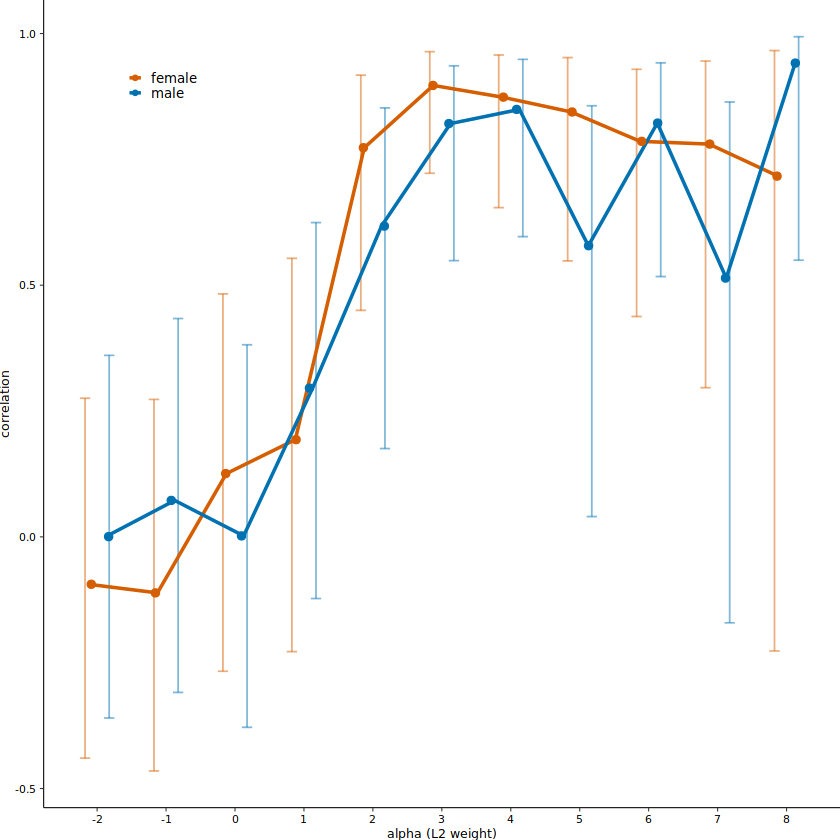

In [51]:
# 그래프 그리기
p <- ggplot(results, aes(x = weight, y = correlation, color = sex)) +
  geom_errorbar(
    aes(ymin = ci_lower, ymax = ci_upper),
    width = 0.3,
    alpha = 0.5,
    position = position_dodge(width = 0.7)
  ) +
  geom_line(size = 1, position = position_dodge(width = 0.5)) +
  geom_point(size = 2, position = position_jitterdodge(jitter.width = 0.1, dodge.width = 0.5)) +
  scale_x_continuous(breaks = unique(results$weight)) +
  labs(
    x = "alpha (L2 weight)",
    y = "correlation"
  ) +
  scale_color_manual(values = c("male" = "#0072B2", "female" = "#D55E00")) +  # 대비되는 색으로 변경
  get_nature_theme() +
  theme(
    legend.position = c(0.15, 0.9), 
    legend.title = element_blank(), 
    legend.text = element_text(size = 8),   # 텍스트 크기 조정
    legend.key.height = unit(0.1, "cm"),    # 범례 도형 높이
    legend.key.width = unit(0.3, "cm")      # 범례 도형 너비
  ) +
  guides(
    color = guide_legend(
      override.aes = list(size = 1.2)  # 범례 도형 크기 최소화
    )
  )

p

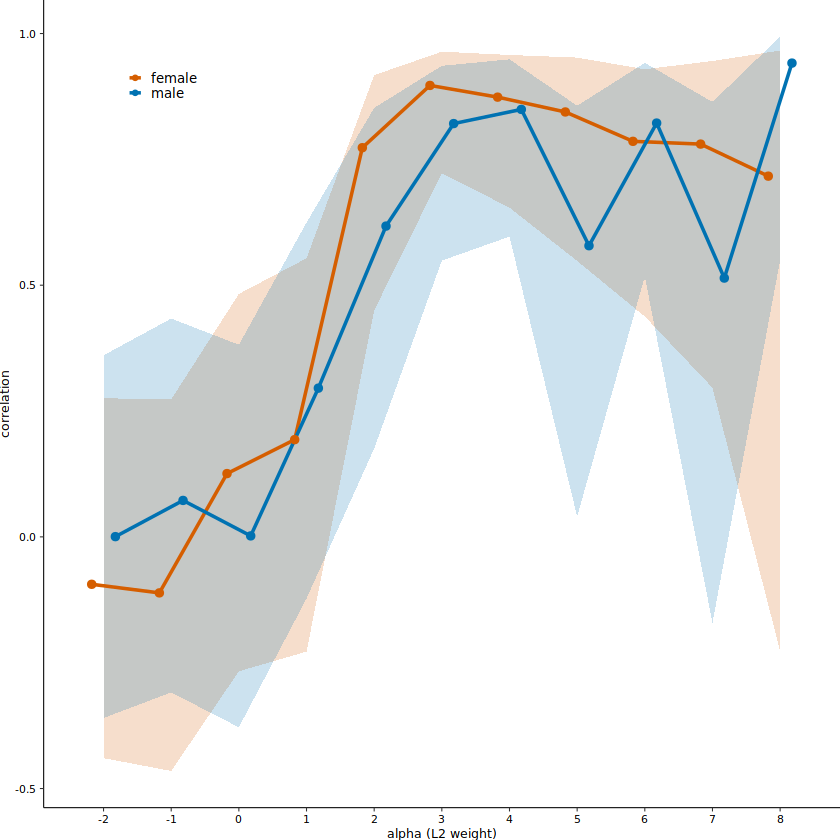

In [10]:
p <- ggplot(results, aes(x = weight, y = correlation, color = sex, fill = sex)) +
  geom_ribbon(
    aes(ymin = ci_lower, ymax = ci_upper),
    alpha = 0.2,
    color = NA,
    # position = position_dodge(width = 0.7)
  ) +
  geom_line(size = 1, position = position_dodge(width = 0.7)) +
  geom_point(size = 2, position = position_dodge(width = 0.7)) +
  scale_x_continuous(breaks = unique(results$weight)) +
  labs(
    x = "alpha (L2 weight)",
    y = "correlation"
  ) +
  scale_color_manual(values = c("male" = "#0072B2", "female" = "#D55E00")) +
  scale_fill_manual(values = c("male" = "#0072B2", "female" = "#D55E00")) +  # ribbon 색상 추가
  get_nature_theme() +
  theme(
    legend.position = c(0.15, 0.9),
    legend.title = element_blank(),
    legend.text = element_text(size = 8),
    legend.key.height = unit(0.1, "cm"),
    legend.key.width = unit(0.3, "cm")
  ) +
  guides(
    color = guide_legend(override.aes = list(size = 1.2)),
    fill = "none"  # fill 범례 숨기기
  )
p

In [11]:
output_path <- paste0(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/figures/UKB.XmXf.alpha-corr-with-GCTA.pdf"
)

ggsave(
    filename = output_path,
    plot = p,
    width = 81.5,
    height = 46,
    units = "mm",
    dpi = 300,
    device = cairo_pdf
)
